# House Price Analysis

## Regression Tree (Instructor)

In [1]:
# load the libraries and data
library(rpart)
library(MASS)
boston = Boston

In [2]:
# see the Boston dataset's docs
?Boston

Boston {MASS},R Documentation


In [3]:
# make a function to split the data into a training set and a validation set
test_train_split = function(data, test_size=.25){
    
    # the the number of observations in the data
    n_obs = dim(data)[1]
    
    # find the number of training observations by rounding up
    n_train_obs = ceiling(n_obs * (1 - test_size))
    
    # get the train indexes
    train_idx = sample(n_obs, n_train_obs)
    
    # split the data
    train = data[train_idx, ]
    test = data[-train_idx, ]

    # return the result
    result = list(train, test)
    return(result)
}

In [4]:
# write a function to calculate the MSE
calc_MSE = function (model, data){
    return (
        mean(
            (data$medv - predict(model, data)) ^ 2
        )
    )
}

In [5]:
# see a summary of the boston data
summary(boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

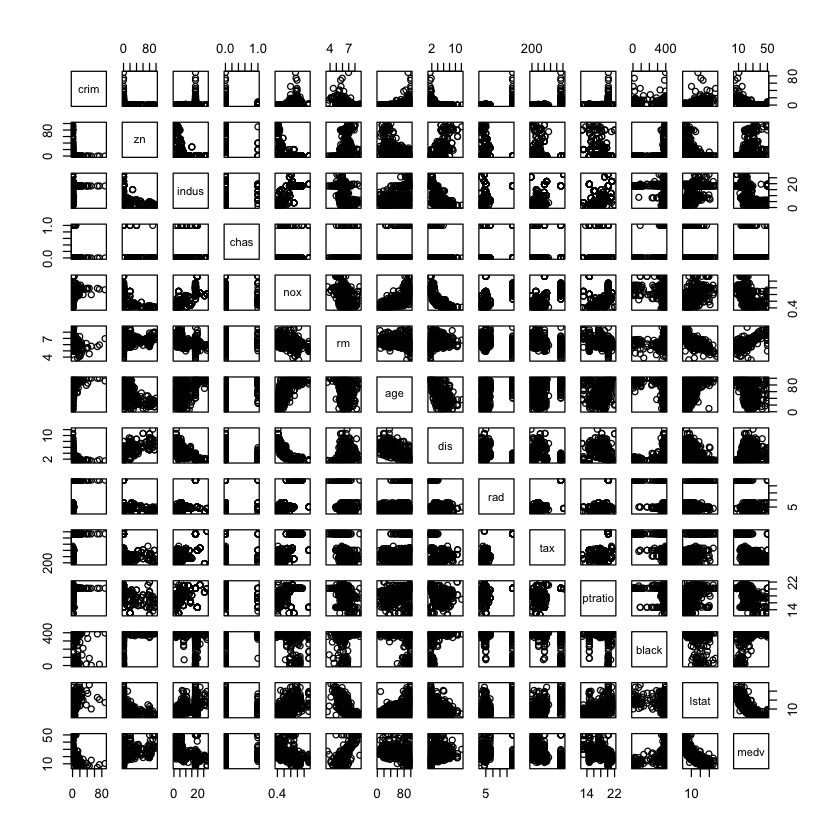

In [6]:
# plot the boston data
plot(boston)

In [7]:
# split the data
set.seed(1)
result = test_train_split(boston)
train = data.frame(result[1])
test = data.frame(result[2])

In [8]:
# train a decsion tree and show results
tree_unpruned = rpart(medv ~ ., data=train)
summary(tree_unpruned)

Call:
rpart(formula = medv ~ ., data = train)
  n= 380 

          CP nsplit rel error    xerror       xstd
1 0.44446218      0 1.0000000 1.0051123 0.09734885
2 0.19772421      1 0.5555378 0.6043384 0.06260471
3 0.06967648      2 0.3578136 0.4208875 0.05391218
4 0.04567379      3 0.2881371 0.3364727 0.04532462
5 0.02591182      4 0.2424633 0.2922632 0.04214460
6 0.01392855      5 0.2165515 0.2652128 0.04393423
7 0.01270428      6 0.2026230 0.2758441 0.04386632
8 0.01000000      7 0.1899187 0.2710944 0.04393219

Variable importance
     rm   lstat ptratio    crim   indus     age     dis     nox      zn   black 
     32      24       7       7       7       7       6       5       2       2 

Node number 1: 380 observations,    complexity param=0.4444622
  mean=22.56684, MSE=82.21301 
  left son=2 (335 obs) right son=3 (45 obs)
  Primary splits:
      rm      < 7.0105   to the left,  improve=0.4444622, (0 missing)
      lstat   < 9.725    to the right, improve=0.4268391, (0 missing)
    

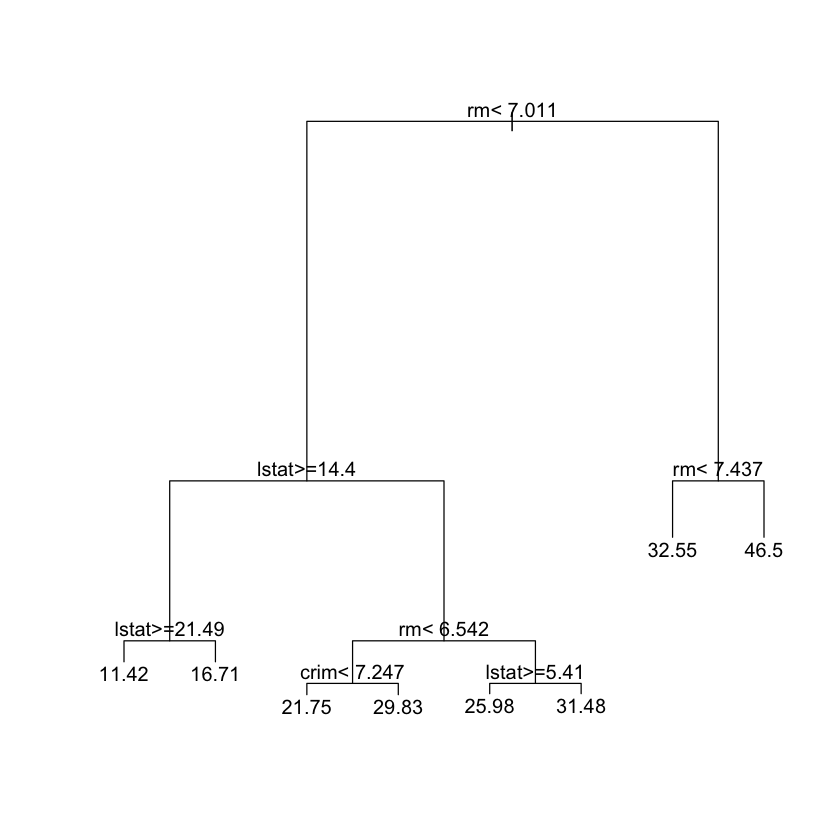

In [9]:
# plot the unpruned tree
plot(tree_unpruned)
text(tree_unpruned)

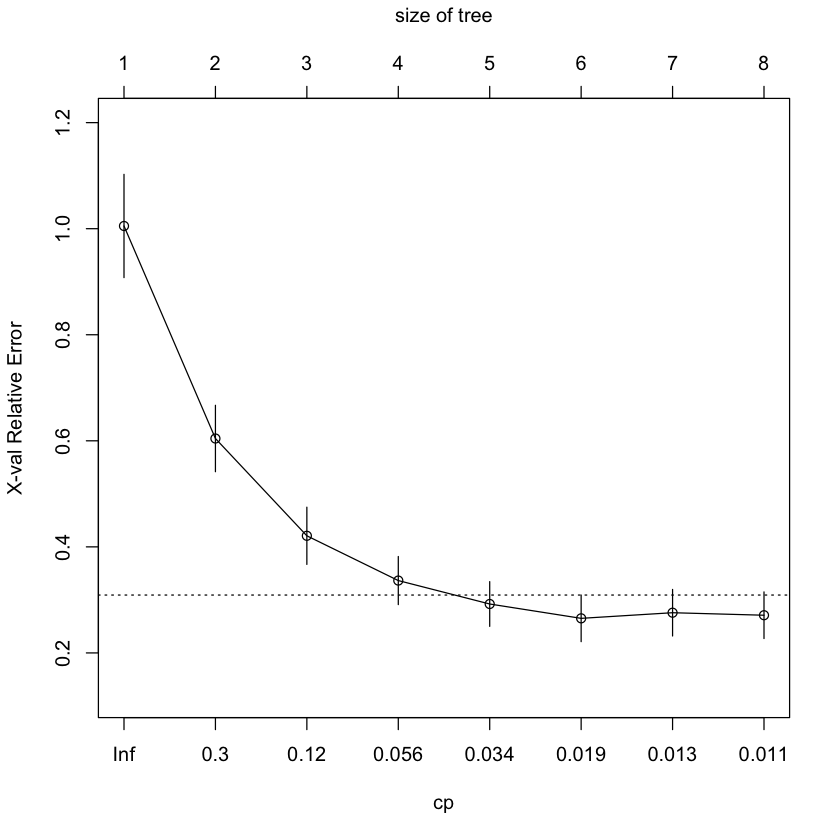

In [10]:
# show a plot of complexity parameter (penalty) versus relative error
plotcp(tree_unpruned)

In [11]:
# prune the tree at the 5th node and show the summary
tree_pruned = prune(tree_unpruned, cp=.019)
summary(tree_pruned)

Call:
rpart(formula = medv ~ ., data = train)
  n= 380 

          CP nsplit rel error    xerror       xstd
1 0.44446218      0 1.0000000 1.0051123 0.09734885
2 0.19772421      1 0.5555378 0.6043384 0.06260471
3 0.06967648      2 0.3578136 0.4208875 0.05391218
4 0.04567379      3 0.2881371 0.3364727 0.04532462
5 0.02591182      4 0.2424633 0.2922632 0.04214460
6 0.01900000      5 0.2165515 0.2652128 0.04393423

Variable importance
     rm   lstat   indus ptratio     age    crim     dis     nox   black      zn 
     34      24       7       7       7       6       6       5       2       2 

Node number 1: 380 observations,    complexity param=0.4444622
  mean=22.56684, MSE=82.21301 
  left son=2 (335 obs) right son=3 (45 obs)
  Primary splits:
      rm      < 7.0105   to the left,  improve=0.4444622, (0 missing)
      lstat   < 9.725    to the right, improve=0.4268391, (0 missing)
      indus   < 3.985    to the right, improve=0.2579173, (0 missing)
      ptratio < 19.65    to the righ

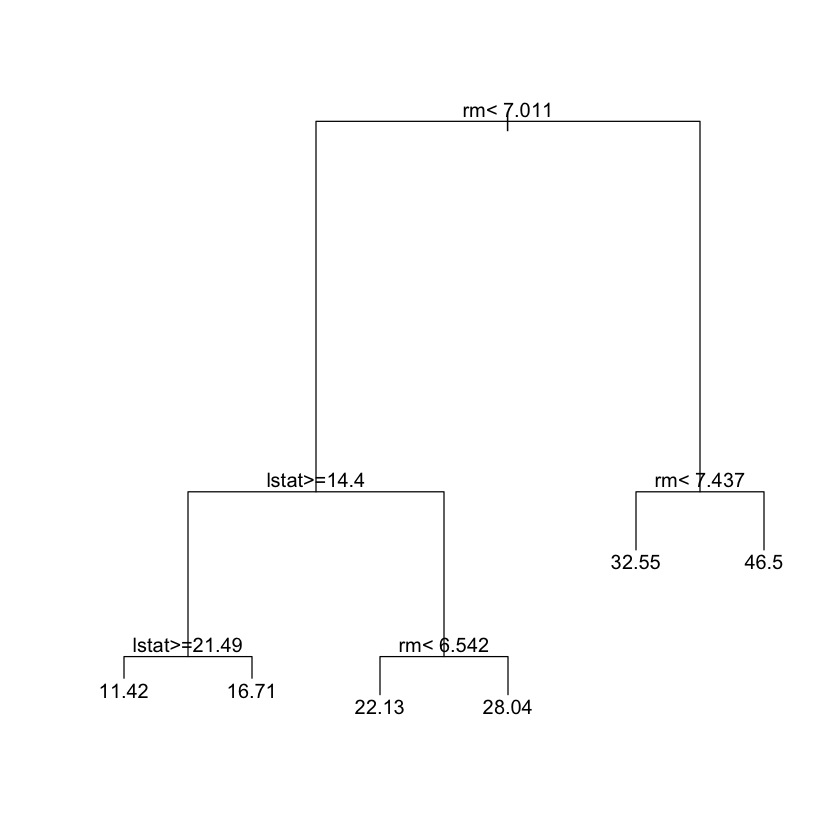

In [12]:
# plot the pruned tree
plot(tree_pruned)
text(tree_pruned)

In [13]:
# find the test mse for the unpruned tree
calc_MSE(tree_unpruned, test)

[1] 29.2398

In [14]:
# find the test mse for the pruned tree
calc_MSE(tree_pruned, test)

[1] 30.14782